In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix,f1_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = pd.read_csv('wdbc.data')
df.drop('ID',axis = 1,inplace = True)

In [5]:
df.head()

,Diagonsis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_Points_mean,Symmetry_mean,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_diamension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
le = LabelEncoder()
le.fit(df['Diagonsis'])
df['Diagonsis'] = le.transform(df['Diagonsis'])
df.head()


,Diagonsis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_Points_mean,Symmetry_mean,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_diamension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
xx=X.copy()  #for without preprocessing
yy=y.copy() #for without preprocessing

In [13]:
l = ["Radius_mean","Texture_mean","Perimeter_mean","Area_mean","Area_se","Worst_Radius","Worst_Texture","Worst_Perimeter",'Worst_Area']

mms = MinMaxScaler()
mms.fit(X[l])
X[l] = mms.transform(X[l])

X.head()

,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_Points_mean,Symmetry_mean,Fractal_diamension_mean,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_diamension
0,0.521037,0.022658,0.545989,0.363733,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.620776,0.141525,0.668310,0.450698,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.643144,0.272574,0.615783,0.501591,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.606901,0.303571,0.539818,0.435214,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.601496,0.390260,0.595743,0.449417,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.556386,0.360075,0.508442,0.374508,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.210090,0.360839,0.233501,0.102906,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.248310,0.385928,0.241347,0.094008,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.629893,0.156578,0.630986,0.489290,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.519744,0.123934,0.506948,0.341575,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


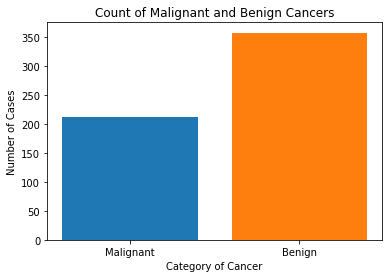

In [14]:
l = ["Malignant","Benign"]
m = y[y == 1].count()
b = y[y == 0].count()

plt.figure()
plt.bar(l[0],m)
plt.bar(l[1],b)
plt.xlabel("Category of Cancer")
plt.ylabel("Number of Cases")
plt.title("Count of Malignant and Benign Cancers")
plt.show()

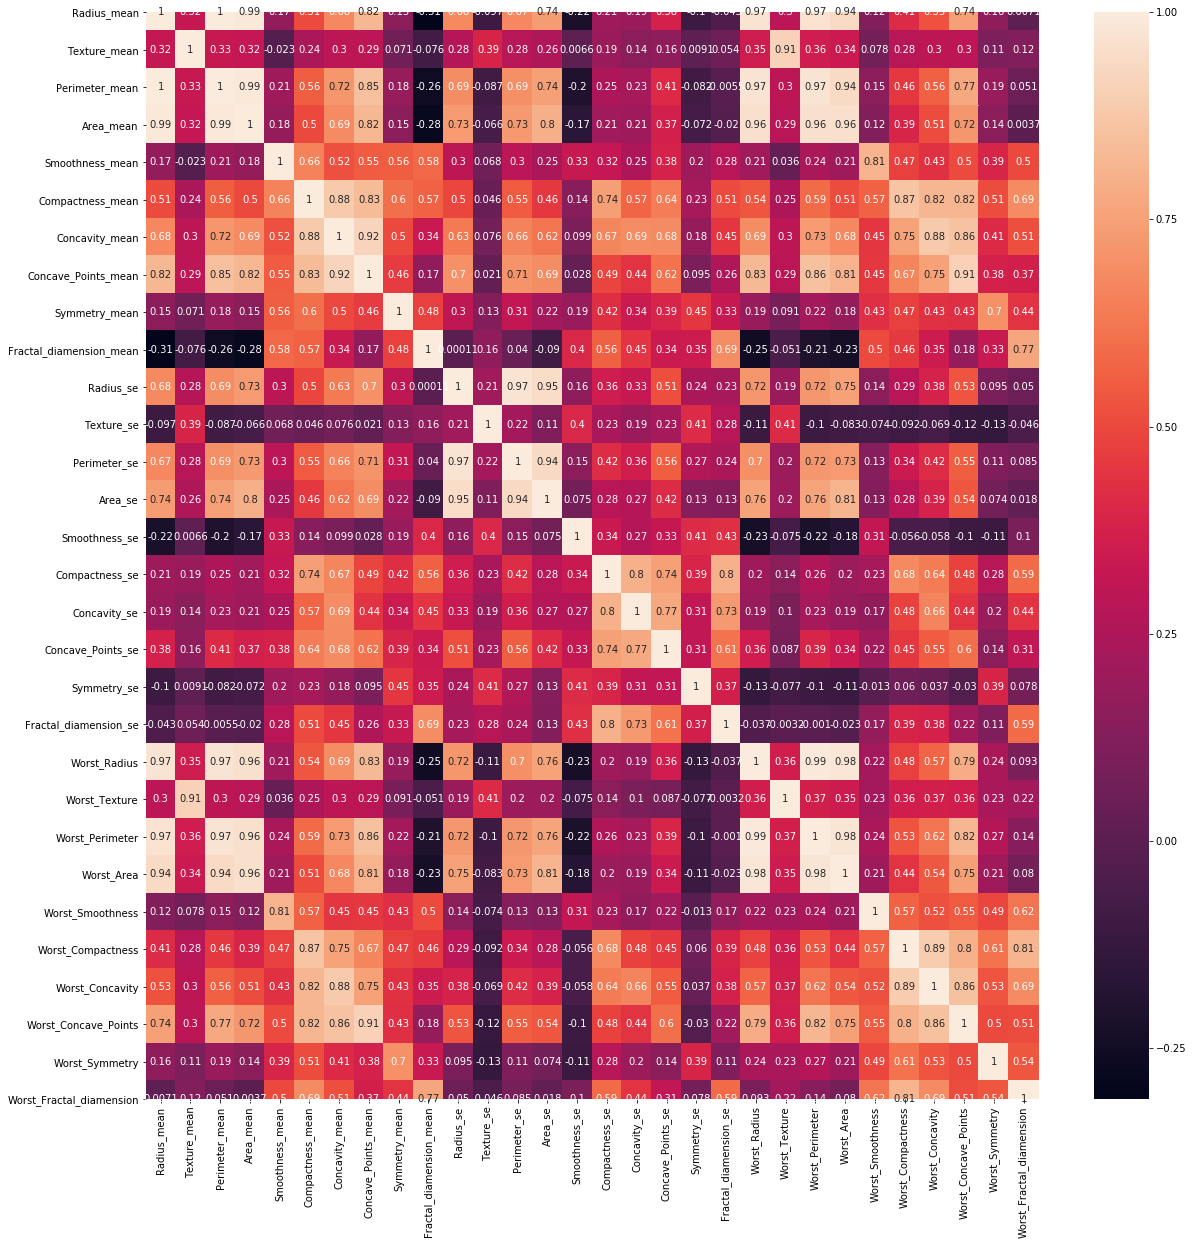

In [15]:
corr = X.corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr,annot = True)
plt.show()

In [16]:
# All the data related to Perimeter (Perimeter_mean,Perimeter_se and Worst_Perimeter) are highly correlated to
# the respective values of area and radius.

In [17]:
columns = np.full((corr.shape[0],), True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = X.columns[columns]

X = X[selected_columns]
selected_columns = list(selected_columns.values)
X.head()

,Radius_mean,Texture_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Symmetry_mean,Fractal_diamension_mean,Radius_se,Texture_se,Smoothness_se,Compactness_se,Concavity_se,Concave_Points_se,Symmetry_se,Fractal_diamension_se,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Symmetry,Worst_Fractal_diamension
0,0.521037,0.022658,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,0.643144,0.272574,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,0.601496,0.390260,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,0.210090,0.360839,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,0.629893,0.156578,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [18]:
def p_threshold(X, y, sl, columns):
    numOfVars = len(columns)
    for i in range(0, numOfVars):
        regressor_OLS = sm.OLS(y, X).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numOfVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    t = columns[j]
                    X.drop(t,axis = 1,inplace = True)
                    columns.pop(j)
    print(regressor_OLS.summary())
    return X, columns

SL = 0.05
X, selected_columns = p_threshold(X, y, SL, selected_columns)

                                 OLS Regression Results                                
Dep. Variable:              Diagonsis   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              216.2
Date:                Fri, 29 Nov 2019   Prob (F-statistic):                   1.42e-207
Time:                        23:17:03   Log-Likelihood:                         -14.135
No. Observations:                 569   AIC:                                      54.27
Df Residuals:                     556   BIC:                                      110.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [19]:
X.head()

,Radius_mean,Texture_mean,Concavity_mean,Fractal_diamension_mean,Radius_se,Compactness_se,Concavity_se,Concave_Points_se,Fractal_diamension_se,Worst_Smoothness,Worst_Concavity,Worst_Symmetry,Worst_Fractal_diamension
0,0.521037,0.022658,0.3001,0.07871,1.0950,0.04904,0.05373,0.01587,0.006193,0.1622,0.7119,0.4601,0.11890
1,0.643144,0.272574,0.0869,0.05667,0.5435,0.01308,0.01860,0.01340,0.003532,0.1238,0.2416,0.2750,0.08902
2,0.601496,0.390260,0.1974,0.05999,0.7456,0.04006,0.03832,0.02058,0.004571,0.1444,0.4504,0.3613,0.08758
3,0.210090,0.360839,0.2414,0.09744,0.4956,0.07458,0.05661,0.01867,0.009208,0.2098,0.6869,0.6638,0.17300
4,0.629893,0.156578,0.1980,0.05883,0.7572,0.02461,0.05688,0.01885,0.005115,0.1374,0.4000,0.2364,0.07678


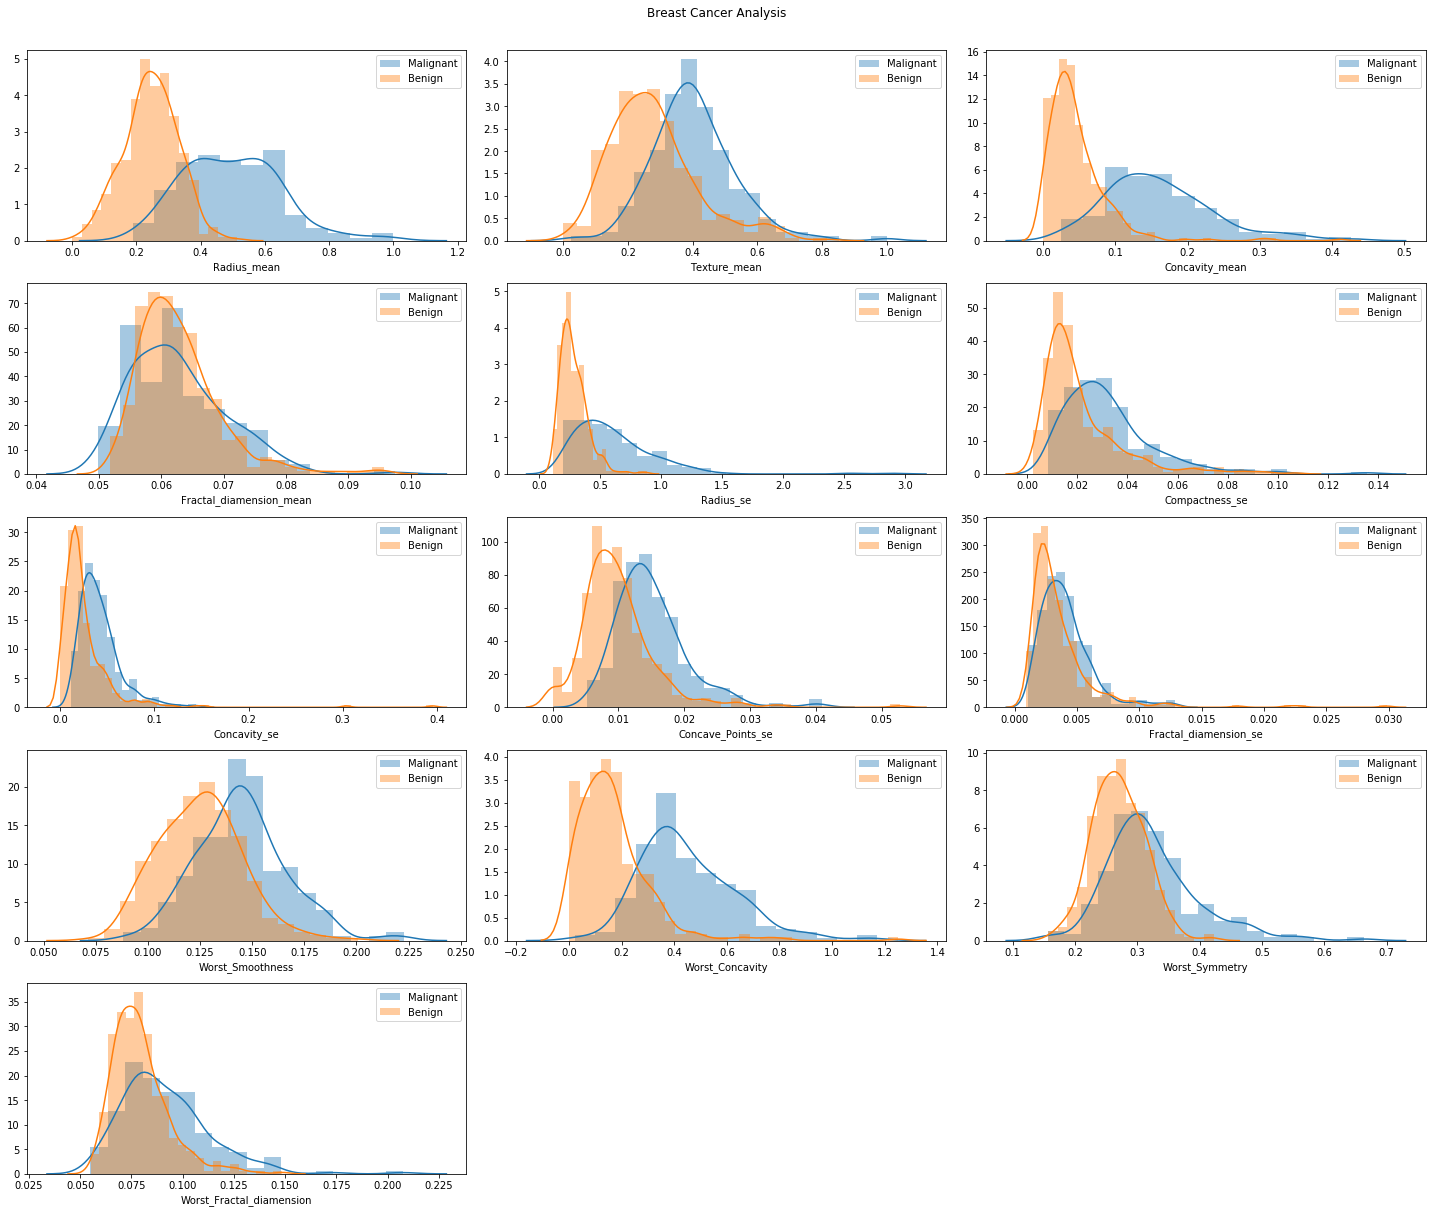

In [20]:
plt.figure(figsize = (20, 20))
j = 0
for i in X.columns:
    plt.subplot(6, 3, j+1)
    j += 1
    sns.distplot(X[i][y==1], label = 'Malignant')
    sns.distplot(X[i][y==0], label = 'Benign')
    plt.legend(loc='best')
plt.suptitle('Breast Cancer Analysis')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [22]:
svc = SVC(C = 1.0,kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [23]:
print("Accuracy of SVC:",round(accuracy_score(y_test,y_pred_svc)*100,2))
print("Precision of SVC:",round(precision_score(y_test,y_pred_svc),2))
print("Recall of SVC:",round(recall_score(y_test,y_pred_svc),2))
print("F- score of SVC:",round(f1_score(y_test,y_pred_svc),2))

Accuracy of SVC: 93.71
Precision of SVC: 0.98
Recall of SVC: 0.85
F- score of SVC: 0.91


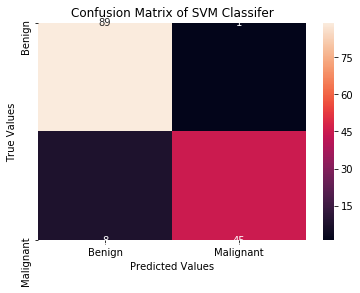

In [24]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot = True)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix of SVM Classifer")
plt.xticks([0.5,1.5],["Benign","Malignant"])
plt.yticks([0.5,1.5],["Benign","Malignant"])
plt.show()

Accuracy of SVC: 62.94
Precision of SVC: 0.0
Recall of SVC: 0.0
F- score of SVC: 0.0


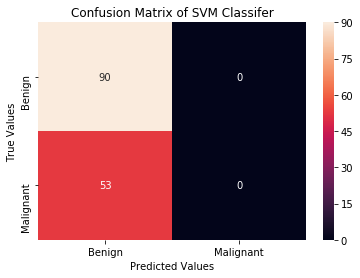

In [8]:
# results without preprocessing

X_train,X_test,y_train,y_test = train_test_split(xx,yy,test_size = 0.25,random_state = 0)
svc = SVC(C = 1.0,kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
print("Accuracy of SVC:",round(accuracy_score(y_test,y_pred_svc)*100,2))
print("Precision of SVC:",round(precision_score(y_test,y_pred_svc),2))
print("Recall of SVC:",round(recall_score(y_test,y_pred_svc),2))
print("F- score of SVC:",round(f1_score(y_test,y_pred_svc),2))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot = True)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix of SVM Classifer")
plt.xticks([0.5,1.5],["Benign","Malignant"])
plt.yticks([0.5,1.5],["Benign","Malignant"])
plt.show()